In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);



/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
df = pd.read_csv("churn.csv", index_col=0)

In [3]:
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [24]:
df.shape

(10000, 13)

In [25]:
df.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [10]:
df.isnull().any()

CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [28]:
df["CreditScore"].max()

850

In [124]:
df.groupby("NumOfProducts")["Exited"].value_counts()

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4242
               1          348
3              1          220
               0           46
4              1           60
Name: Exited, dtype: int64

In [21]:
df[(df["Balance"] == 0) & (df["Exited"] == 1)].shape

(500, 17)

In [24]:
df[(df["Balance"] == 0) & (df["HasCrCard"] == 0)].shape

(1025, 17)

In [25]:
df[(df["Balance"] == 0) & (df["IsActiveMember"] == 0)].shape

(1744, 17)

CreditScore  NewAGT
350          39         1
             40         1
             41         1
             53         1
             57         1
351          53         1
358          44         1
359          38         1
363          22         1
365          30         1
367          36         1
373          35         1
376          25         1
             40         1
382          36         1
383          40         1
386          52         1
395          29         1
399          44         1
401          40         1
404          50         1
405          26         1
             29         1
407          36         1
408          37         1
             76         1
410          27         1
             28         1
             48         1
411          26         1
             29         1
             33         1
             45         1
412          24         1
413          25         1
             33         1
             38         1
414          30   

In [125]:
df.groupby("NumOfProducts")["Tenure"].value_counts()

NumOfProducts  Tenure
1              1         568
               3         529
               8         525
               7         517
               4         504
               5         501
               9         500
               6         490
               2         473
               10        241
               0         236
2              2         543
               7         482
               5         468
               8         468
               4         462
               6         456
               9         451
               1         431
               3         430
               10        228
               0         171
3              3          42
               5          36
               1          32
               8          28
               7          24
               9          23
               2          21
               4          20
               6          17
               10         17
               0           6
4              2     

In [126]:
df.groupby("NumOfProducts")["IsActiveMember"].value_counts()

NumOfProducts  IsActiveMember
1              1                 2563
               0                 2521
2              1                 2446
               0                 2144
3              0                  153
               1                  113
4              0                   31
               1                   29
Name: IsActiveMember, dtype: int64

In [127]:
df.groupby("NumOfProducts")["CreditScore"].mean()

NumOfProducts
1    649.120968
2    652.188671
3    648.105263
4    653.583333
Name: CreditScore, dtype: float64

In [128]:
df.groupby("NumOfProducts")["CreditScore"].describe()

,count,mean,std,min,25%,50%,75%,max
NumOfProducts,,,,,,,,
1,5084.0,649.120968,97.203710,350.0,581.0,651.0,717.0,850.0
2,4590.0,652.188671,96.066831,350.0,586.0,653.0,719.0,850.0
3,266.0,648.105263,95.190396,358.0,586.0,650.0,711.0,850.0
4,60.0,653.583333,101.265600,376.0,595.0,643.0,708.0,850.0


In [129]:
df.groupby("Geography")["IsActiveMember"].value_counts()

Geography  IsActiveMember
France     1                 2591
           0                 2423
Germany    0                 1261
           1                 1248
Spain      1                 1312
           0                 1165
Name: IsActiveMember, dtype: int64

In [130]:
df.groupby("Geography")["Exited"].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [131]:
df.groupby("Geography")["IsActiveMember"].value_counts()

Geography  IsActiveMember
France     1                 2591
           0                 2423
Germany    0                 1261
           1                 1248
Spain      1                 1312
           0                 1165
Name: IsActiveMember, dtype: int64

In [132]:
df.groupby("IsActiveMember")["Exited"].value_counts()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64

In [133]:
df.groupby("IsActiveMember")["HasCrCard"].value_counts()

IsActiveMember  HasCrCard
0               1            3448
                0            1401
1               1            3607
                0            1544
Name: HasCrCard, dtype: int64

In [134]:
df.groupby("HasCrCard")["Exited"].value_counts()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: Exited, dtype: int64

In [135]:
df.groupby("CreditScore")["Tenure"].value_counts()

CreditScore  Tenure
350          0          2
             1          1
             3          1
             10         1
351          4          1
358          8          1
359          6          1
363          6          1
365          0          1
367          6          1
373          7          1
376          4          1
             6          1
382          0          1
383          8          1
386          1          1
395          5          1
399          2          1
401          8          1
404          4          1
405          5          1
             10         1
407          1          1
408          3          1
             8          1
410          2          1
             6          1
             7          1
411          0          1
             2          1
             9          1
             10         1
412          5          1
413          1          1
             2          1
             9          1
414          3          1
             8    

In [12]:
df.groupby("NewAGT")["HasCrCard"].value_counts()

NewAGT  HasCrCard
8       0              2
9       0              1
10      1              5
        0              2
11      1              8
        0              4
12      1             15
        0              5
13      1             25
        0             10
14      1             29
        0             15
15      1             31
        0             14
16      1             45
        0             18
17      1             64
        0             29
18      1             95
        0             32
19      1             97
        0             41
20      1            145
        0             47
21      1            130
        0             56
22      1            178
        0             78
23      1            192
        0             66
24      1            216
        0             81
25      1            266
        0            104
26      1            245
        0            102
27      1            265
        0            110
28      1            307
       

In [12]:
df.groupby("NewAGT")["NumOfProducts"].value_counts()

NewAGT  NumOfProducts
8       1                  1
        2                  1
9       1                  1
10      1                  4
        2                  3
11      1                  6
        2                  6
12      2                 14
        1                  6
13      2                 20
        1                 15
14      1                 26
        2                 16
        3                  2
15      2                 24
        1                 21
16      2                 33
        1                 29
        3                  1
17      1                 49
        2                 43
        3                  1
18      2                 67
        1                 57
        3                  3
19      2                 85
        1                 53
20      2                105
        1                 84
        3                  3
21      2                101
        1                 84
        3                  1
22      2            

In [16]:
df.groupby("IsActiveMember")["NewAGT"].value_counts()

IsActiveMember  NewAGT
0               30        238
                33        226
                32        220
                31        219
                29        210
                35        200
                36        197
                34        196
                25        193
                28        191
                27        179
                37        178
                26        170
                38        163
                24        140
                40        137
                23        135
                39        133
                41        131
                22        125
                42        104
                20         97
                21         97
                44         76
                19         72
                43         68
                45         67
                46         67
                47         58
                18         55
                17         51
                48         47
                5

In [24]:
df.groupby("Age")["NumOfProducts"].value_counts()

Age  NumOfProducts
18   1                 11
     2                 11
19   1                 17
     2                 10
20   2                 22
     1                 18
21   2                 33
     1                 19
     3                  1
22   1                 43
     2                 38
     3                  3
23   2                 52
     1                 47
24   1                 67
     2                 63
     3                  2
25   2                 87
     1                 63
     3                  4
26   2                101
     1                 98
     3                  1
27   2                113
     1                 93
     3                  3
28   2                149
     1                117
     3                  7
29   2                180
     1                162
     3                  5
     4                  1
30   2                166
     1                155
     3                  5
     4                  1
31   2             

In [11]:
df.groupby("Age")["Tenure"].value_counts()

Age  Tenure
18   2          4
     1          3
     4          3
     7          3
     3          2
     8          2
     10         2
     5          1
     6          1
     9          1
19   5          5
     9          4
     1          3
     3          3
     6          3
     8          3
     2          2
     7          2
     0          1
     4          1
20   4          8
     8          8
     3          5
     0          4
     7          4
     6          3
     9          3
     1          2
     2          1
     5          1
     10         1
21   1         12
     8          9
     4          6
     3          5
     7          5
     9          4
     2          3
     6          3
     10         3
     0          2
     5          1
22   5         12
     3         11
     7         11
     8         11
     6          9
     4          8
     9          8
     2          5
     10         5
     0          3
     1          1
23   5         16
     2         1

In [27]:
df.groupby("Age")["Exited"].value_counts()

Age  Exited
18   0          20
     1           2
19   0          26
     1           1
20   0          38
     1           2
21   0          50
     1           3
22   0          72
     1          12
23   0          93
     1           6
24   0         118
     1          14
25   0         148
     1           6
26   0         186
     1          14
27   0         196
     1          13
28   0         250
     1          23
29   0         320
     1          28
30   0         303
     1          24
31   0         371
     1          33
32   0         386
     1          32
33   0         398
     1          44
34   0         414
     1          33
35   0         417
     1          57
36   0         403
     1          53
37   0         416
     1          62
38   0         414
     1          63
39   0         351
     1          72
40   0         343
     1          89
41   0         297
     1          69
42   0         244
     1          77
43   0         209
     1          88


In [ ]:
df.groupby("NewPro")["Exited"].value_counts()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   Surname            10000 non-null  object 
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(8), object(1), uint8(3)
memory usage: 966.8+ KB


In [ ]:
#one_hot encoding

In [9]:
df = pd.get_dummies(df, columns =["Geography", "Gender"], drop_first = True)

In [46]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [6]:
df["NewAgPro"]=df["Age"]*df["NumOfProducts"]*df["Tenure"]

In [7]:
df["NewAGT"] = df["Age"] - df["Tenure"]

In [8]:
df["NewAGTPro"] = df["NewAGT"] * df["NumOfProducts"]

In [38]:
df.head(20)

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewAgPro,NewAGT,NewAGTPro,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,84,40,40,0,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,41,40,40,0,1,0
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1008,34,102,0,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,78,38,76,0,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,86,41,41,0,1,0
6,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,1,704,36,72,0,1,1
7,15592531,Bartlett,822,50,7,0.00,2,1,1,10062.80,0,700,43,86,0,0,1
8,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,1,464,25,100,1,0,0
9,15792365,He,501,44,4,142051.07,2,0,1,74940.50,0,352,40,80,0,0,1


In [10]:
X=df.drop(["Exited","Surname"],axis=1)


In [11]:
y=df["Exited"]

In [31]:
cols = X.columns
index = X.index
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state = 12345)



#Dengesiz bir veri seti olduğu için örneklem sayısını arttıracağız
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [34]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

In [35]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.800500)
KNN: (0.837000)
CART: (0.780000)
RF: (0.854500)
SVM: (0.843500)
XGB: (0.854000)
LightGBM: (0.854000)
CatBoost: (0.854500)


In [36]:
models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))
models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

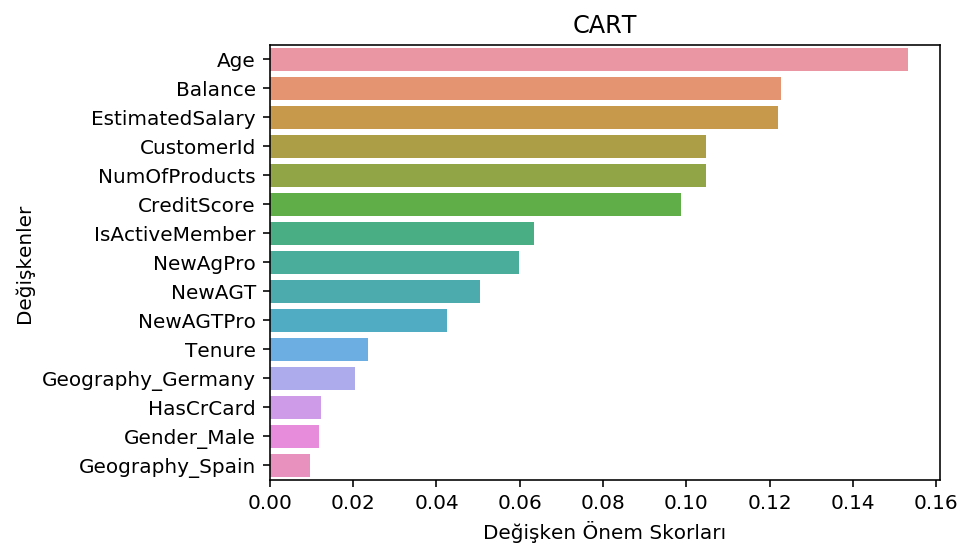

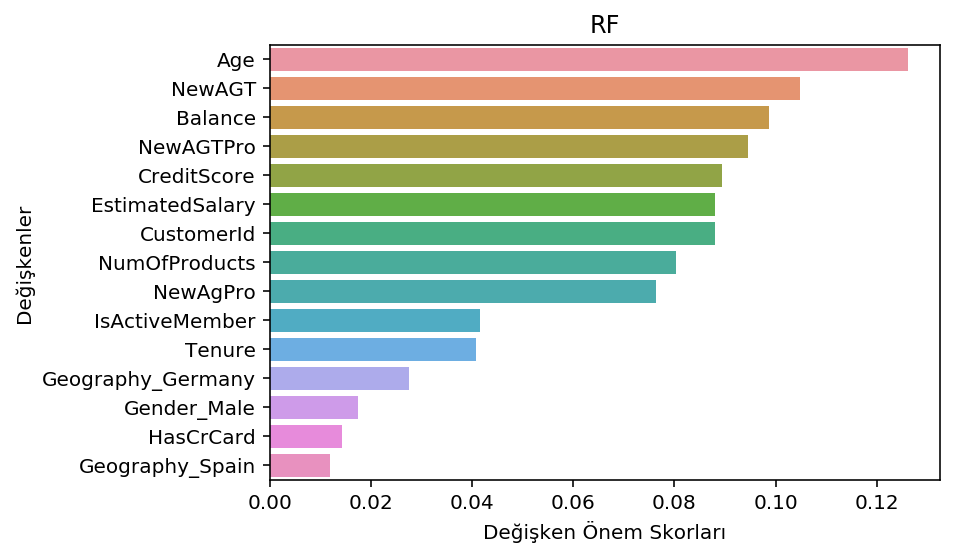

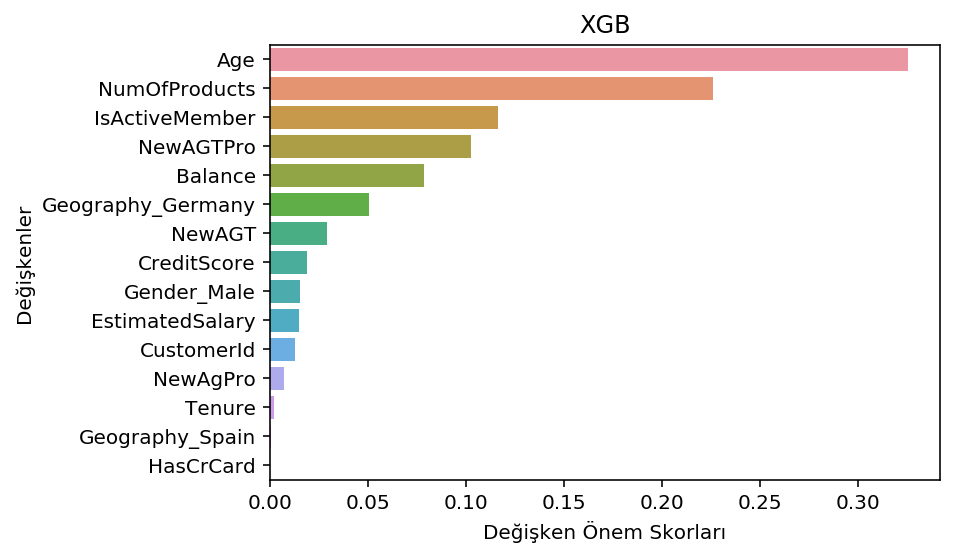

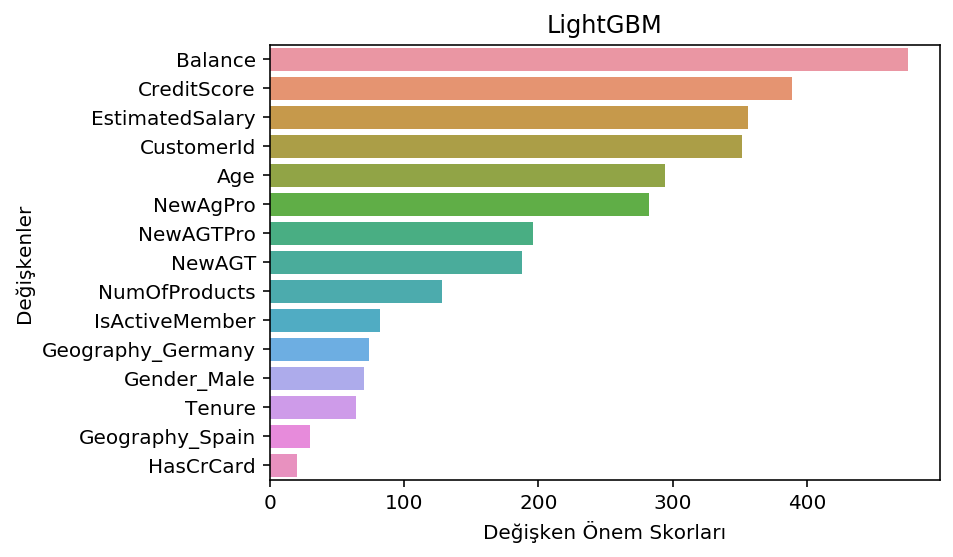

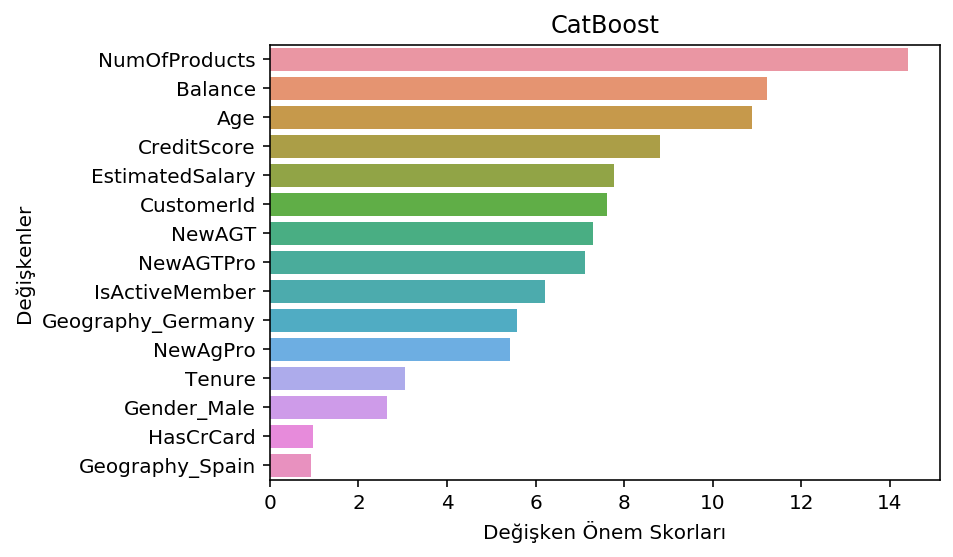

In [30]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()